In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('House_Price_data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
X = df[['sqft_living']].values
y = df['price'].values

In [5]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

In [6]:
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [8]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [11]:
X_range = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
y_range_pred = svr.predict(X_range)

In [12]:
epsilon = svr.epsilon
y_upper = y_range_pred + epsilon
y_lower = y_range_pred - epsilon

In [13]:
X_range_inv = scaler_X.inverse_transform(X_range)
y_range_pred_inv = scaler_y.inverse_transform(y_range_pred.reshape(-1, 1))
y_upper_inv = scaler_y.inverse_transform(y_upper.reshape(-1, 1))
y_lower_inv = scaler_y.inverse_transform(y_lower.reshape(-1, 1))

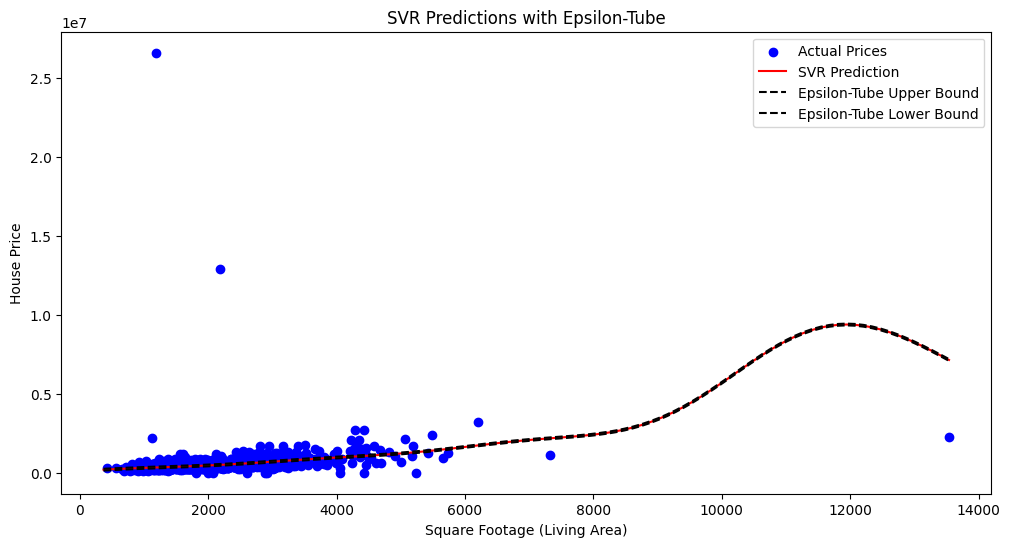

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(scaler_X.inverse_transform(X_test), scaler_y.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Actual Prices')
plt.plot(X_range_inv, y_range_pred_inv, color='red', label='SVR Prediction')
plt.plot(X_range_inv, y_upper_inv, 'k--', label='Epsilon-Tube Upper Bound')
plt.plot(X_range_inv, y_lower_inv, 'k--', label='Epsilon-Tube Lower Bound')
plt.title('SVR Predictions with Epsilon-Tube')
plt.xlabel('Square Footage (Living Area)')
plt.ylabel('House Price')
plt.legend()
plt.show()